In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

incidence_data=pd.read_excel('/content/incidence.xlsx')

In [5]:
incidence_data

,Year,"Adjusted 19A incidence (per 10,000 tested)",Proportion of 19A cases among IPD (%)
0,2010,38.599619,3.488372
1,2011,31.841612,2.272727
2,2012,9.463455,1.941748
3,2013,20.675498,2.727273
4,2014,11.519577,2.173913
5,2015,10.265616,2.654867
6,2016,11.921684,1.234568
7,2017,0.000000,1.204819
8,2018,0.000000,3.076923
9,2019,14.546499,5.405405


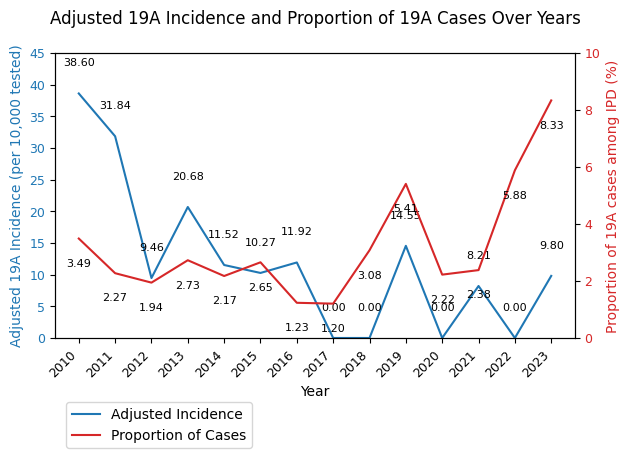

In [8]:
 # Convert 'Year' variable to string
incidence_data['Year'] = incidence_data['Year'].astype(str)

# Create evenly spaced points for the x-axis
x = np.linspace(0, len(incidence_data['Year']) - 1, len(incidence_data['Year']))
x_labels = incidence_data['Year']

# Plotting the data with corrected percentage values
fig, ax1 = plt.subplots()

color = 'tab:blue'
ax1.set_xlabel('Year', fontsize=10)
ax1.set_ylabel('Adjusted 19A Incidence (per 10,000 tested)', color=color, fontsize=10)
ax1.plot(x, incidence_data['Adjusted 19A incidence (per 10,000 tested)'], color=color, label='Adjusted Incidence')
ax1.tick_params(axis='y', labelcolor=color, labelsize=9)

ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Proportion of 19A cases among IPD (%)', color=color, fontsize=10)
ax2.plot(x, incidence_data['Proportion of 19A cases among IPD (%)'], color=color, label='Proportion of Cases')
ax2.tick_params(axis='y', labelcolor=color, labelsize=9)

# Adding point labels for both lines with smaller font size
for x_val, y_val in zip(x, incidence_data['Adjusted 19A incidence (per 10,000 tested)']):
    ax1.annotate(f'{y_val:.2f}', (x_val, y_val), textcoords="offset points", xytext=(0,20), ha='center', fontsize=8)
for x_val, y_val in zip(x, incidence_data['Proportion of 19A cases among IPD (%)']):
    ax2.annotate(f'{y_val:.2f}', (x_val, y_val), textcoords="offset points", xytext=(0,-20), ha='center', fontsize=8)

# Set x-axis ticks and labels
ax1.set_xticks(x)
ax1.set_xticklabels(x_labels, rotation=45, ha='right', fontsize=9)


# Adding labels for both lines
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper center', bbox_to_anchor=(0.2, -0.2))


# Set secondary y-axis limit to start from 0
ax1.set_ylim(0, 45)
ax2.set_ylim(0, 10)


fig.suptitle('Adjusted 19A Incidence and Proportion of 19A Cases Over Years')
fig.tight_layout()


plt.savefig('line_fig.png')
plt.show()